# Kapitel 4: Vermittlung und Rezeption

Das Notebook ergänzt Kapitel 4 'Vermittlung und Rezeption'.

# Import

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import copy
from tqdm.notebook import *
from resources_geschichtslyrik import *

In [2]:
meta = pd.read_json(r"../resources/meta.json")

# Verbreitung Geschichtslyrikanthologien

In [22]:
meta_anth = meta.query("corpus == 'anth'")
meta_anth_18501918 = meta_anth.query("1850<=anthology_year_first_ed<=1918")

print(f"Anzahl Anthologien insgesamt : {meta_anth['anthology'].nunique()}")
print(f"Anzahl Anthologien 1850–1918 : {meta_anth_18501918['anthology'].nunique()}")

Anzahl Anthologien insgesamt : 97
Anzahl Anthologien 1850–1918 : 64


[Häntzschel 1991] Günter Häntzschel (Hg.): Bibliographie der deutschsprachigen Lyrikanthologien 1840–1914, 2 Bde., München u. a. 1991.

[Kastner 2003] Barbara Kastner: Statistik und Topographie des Verlagswesens, in: Georg Jäger (Hg.): Geschichte des deutschen Buchhandels im 19. und 20. Jahrhundert. Bd. 1: Das Kaiserreich 1871–1918. Teil 2, Frankfurt am Main 2003, S. 300–367.

In [23]:
geschichtslyrik_furthereds = {
    '1831.Wagner' : [1837, 1841, 1858, 1872],
    '1840.Schottmüller' : [1866],
    '1842/44.Lehmann' : [1855],
    '1844.Niemeyer' : [1871],
    '1846.Kletke' : [1854],
    '1846.Sydow.2(1847)' : [1847],
    '1850.Kriebitzsch' : [1887],
    '1851.Müller/Kletke' : [1855, 1863],
    '1852.Böttger.4(1862)' : [1853, 1855, 1862], # 1853 ist Schätzung
    '1852.Kurz' : [1853, 1859, 1868],
    '1855.Lüttringhaus.2(1857)' : [1857, 1877],
    '1858.Lüttringhaus' : [1865, 1877],
    '1862.Fricke' : [1867],
    '1865.Anonym' : [1888],
    '1867.Scholz' : [1871],
    '1868.Corens.2(1872)' : [1872],
    '1870.Brünnert.4(1902)' : [1886, 1893, 1902],
    '1872.Bindewald.2(1875)' : [1875],
    '1878.Krämer' : [1895],
    '1878.Pennerstorfer.2(1879)' : [1879],
    '1879.Teuffenbach' : [1898],
    '1881.Polack' : [1897],
    '1902.Lomberg' : [1903, 1904, 1907, 1909, 1912, 1917],
    '1906/07.Weber' : [1925],
    '1909.Meyer-Frommhold' : [1938],
    '1912.Harten/Henniger' : [1922, 1925],
    '1912.Werner' : [1915],
    '1915.Eggert-Windegg' : [1922, 1936],
    '1918.Eschmann' : [1934],
    '1931.Müller.5(1945)' : [1934, 1936, 1941, 1945],
    '1938.Plenzat' : [1943],
    '1958.Kipp' : [1962],
    # '1982.Hölscher-Lohmeyer/Pleticha/Preußler' : [1984]
}

def flatten_list(input_list):
    output_list = [item for sublist in input_list for item in sublist]
    return output_list

geschichtslyrik_furthereds_allyears = flatten_list(geschichtslyrik_furthereds.values())

Das obige dictionary gibt an, wann welche Anthologien des Anthologiekorpus in zusätzlichen Auflagen erschienen sind. Die Anthologie '1831.Wagner' erschien zum Beispiel 1837 in zweiter, 1841 in dritter, 1858 in vierter und 1872 in fünfter Auflage. Von denjenigen Korpusanthologien, die im dictionary nicht aufgeführt werden, erschien nur eine Auflage.

In [24]:
haentzschel_firsteds = {
    1836 : [316],
    1839 : [1560, 1561],
    1840 : [61, 284, 342, 432, 532, 536, 966, 1384, 1679, 1786, 2014],
    1841 : [433, 514, 633, 644, 761, 819, 1030, 1447, 1864, 1930, 1951, 1779],
    1842 : [207, 485, 705, 754, 1029, 1635, 1929, 20],
    1843 : [645, 753, 919, 920, 1031, 1065, 1465, 1632, 1785, 1863, 2008, 180, 1707],
    1844 : [62, 258, 477, 740, 752, 1066, 1139, 1439, 1596, 1610, 1611, 1675, 1676, 1736, 1416],
    1845 : [802, 1399, 1628],
    1846 : [343, 659, 756, 787, 1032, 1061, 1559, 1781, 1897, 1983],
    1847 : [132, 710, 738, 962, 1045, 1101, 1148, 1162, 1202, 1452, 1728, 1783, 2018],
    1848 : [605, 1108, 1149, 1216, 1293, 1320, 1350, 1444, 1547, 1617, 1626, 1698, 1702, 1780, 1805, 1847, 1901, 2000],
    1849 : [257, 479, 511, 737, 1207, 1451, 1886, 1914, 728, 1102, 1637],
    1850 : [224, 368, 509, 671, 1238, 1321, 1337, 1557, 1657, 1750, 1756, 1777, 1969, 1975, 1997, 759],
    1851 : [156, 178, 223, 255, 282, 333, 478, 512, 731, 779, 921, 937, 967, 1166, 1203, 1237, 1241, 1242, 1281, 1282, 1338, 1379, 1422, 1510, 1625, 1631, 1664, 1699, 1848, 1902, 1903, 1981, 1990, 1998, 2001],
    1852 : [159, 162, 215, 273, 339, 384, 447, 657, 709, 717, 718, 719, 721, 777, 891, 1212, 1213, 1340, 1633, 1723, 1775, 1879, 831],
    1853 : [158, 377, 547, 694, 751, 757, 863, 905, 1163, 1208, 1267, 1378, 1446, 1517, 1564, 1746],
    1854 : [117, 217, 401, 444, 670, 720, 729, 736, 904, 931, 961, 1133, 1181, 1250, 1412, 1534, 1553, 1665, 1668, 1673, 2007, 2013, 832],
    1855 : [155, 275, 396, 933, 952, 1096, 1218, 1231, 1324, 1330, 1536, 1615, 1661, 1666, 1678, 1820, 791],
    1856 : [11, 12, 41, 174, 452, 488, 987, 1068, 1106, 1200, 1252, 1291, 1335, 1415, 1527, 1535, 1671, 1674, 1801, 1638, 1172],
    1857 : [23, 331, 472, 549, 654, 655, 917, 1217, 1385, 1809, 1898, 1992],
    1858 : [244, 295, 545, 652, 797, 798, 1219, 1550, 1841, 1854, 1876, 1921, 918],
    1859 : [7, 220, 274, 706, 748, 758, 781, 782, 1019, 1100, 1366, 1591, 1629, 1640, 1711, 1758, 1834, 1909, 1918, 1944, 1996],
    1860 : [16, 122, 164, 237, 253, 254, 306, 315, 352, 407, 442, 562, 624, 693, 712, 755, 780, 784, 793, 830, 848, 903, 1007, 1051, 1079, 1192, 1214, 1348, 1360, 1361, 1538, 1663, 1724, 1856, 1920, 1928, 1793, 849, 951],
    1861 : [87, 259, 294, 395, 543, 629, 648, 739, 760, 827, 829, 893, 922, 1056, 1244, 1290, 1307, 1407, 1436, 1518, 1558, 1566, 1636, 1932],
    1862 : [13, 60, 173, 177, 243, 247, 446, 558, 563, 540, 968, 1050, 1164, 1239, 1308, 1373, 1437, 1660, 1667, 1905, 410],
    1863 : [10, 272, 443, 643, 785, 800, 821, 822, 823, 938, 1067, 1198, 1226, 1322, 1372, 1414, 1431, 1650, 1764, 1868, 1907, 1908, 1927, 2015, 1318, 1686],
    1864 : [86, 688, 999, 1048, 1195, 1295, 1296, 1332, 1333, 1358, 1405, 1442, 1543, 1595, 1598, 1731, 1732, 1778, 1795, 17],
    1865 : [766, 818, 902, 907, 1052, 1180, 1298, 1319, 1341, 1420, 1548, 1716, 1726, 1840, 1888, 1953, 1995, 1869, 1936, 1169],
    1866 : [65, 172, 454, 573, 651, 689, 799, 960, 1266, 1299, 1309, 1354, 1377, 1528, 1656, 1743, 1763, 1789, 1913, 1948, 1991, 1999],
    1867 : [24, 133, 147, 175, 412, 469, 480, 586, 642, 646, 653, 667, 854, 1059, 1125, 1128, 1255, 1316, 1355, 1383, 1529, 1530, 1749, 1922, 1751],
    1868 : [26, 231, 370, 630, 886, 1004, 1035, 1134, 1179, 1331, 1353, 1462, 1917, 1946],
    1869 : [154, 212, 337, 408, 484, 567, 640, 879, 892, 932, 1116, 1225, 1403, 1461, 1600, 1639, 1721, 1857, 1890, 1899, 875, 1563],
    1870 : [146, 160, 165, 221, 233, 556, 569, 715, 765, 977, 988, 1077, 1095, 1117, 1367, 1371, 1381, 1409, 1460, 1712, 1729, 1730, 1771, 1801, 1836, 1860, 1878, 1895, 1904, 882, 1300],
    1871 : [8, 161, 210, 291, 345, 353, 359, 535, 578, 862, 869, 883, 887, 1003, 1081, 1121, 1210, 1254, 1323, 1343, 1349, 1406, 1449, 1450, 1708, 1718, 1741, 1760, 1830, 1837, 1844, 1845, 1874, 1943, 285],
    1872 : [34, 135, 290, 397, 609, 772, 963, 993, 1082, 1143, 1232, 1328, 1334, 1363, 1894],
    1873 : [3, 362, 353, 704, 820, 953, 1008, 1170, 1204, 1317, 1380, 1398, 1448, 1554, 610],
    1874 : [63, 457, 482, 566, 604, 647, 650, 658, 661, 662, 716, 727, 776, 868, 942, 984, 1049, 1118, 1205, 1233, 1441, 1627, 1928],
    1875 : [15, 75, 344, 445, 467, 493, 530, 559, 774, 936, 965, 976, 991, 992, 1098, 1156, 1304, 1526, 1549, 1687, 1688, 1693, 1727, 1787, 1853, 1891, 1919, 1950, 663, 1744, 1900, 847, 1541],
    1876 : [138, 227, 293, 375, 636, 964, 1084, 1097, 1206, 1709, 1867, 1911, 1934, 1966, 1980],
    1877 : [103, 142, 143, 144, 145, 230, 387, 870, 1016, 1041, 1150, 1167, 1196, 1445, 1512, 1532, 1624, 1952, 1982, 2011, 336, 149],
    1878 : [163, 311, 314, 365, 700, 703, 707, 764, 795, 864, 956, 958, 1165, 1174, 1251, 1329, 1454, 1511, 1561, 1725, 1767, 1788, 211, 1191],
    1879 : [35, 100, 171, 241, 256, 296, 304, 305, 468, 476, 534, 560, 638, 687, 697, 874, 884, 989, 1058, 1060, 1074, 1078, 1083, 1176, 1190, 1392, 1513, 1662, 1769, 1810, 1825, 1976, 1988, 1823, 1017],
    1880 : [44, 45, 107, 109, 113, 115, 205, 492, 516, 579, 632, 637, 664, 674, 675, 912, 913, 973, 1005, 1009, 1037, 1070, 1154, 1230, 1514, 1522, 1605, 1641, 1737, 1796, 1833, 990],
    1881 : [229, 301, 453, 537, 564, 639, 691, 763, 834, 900, 1071, 1076, 1119, 1158, 1227, 1515, 1616, 1653, 1655, 1742, 850, 941],
    1882 : [37, 49, 137, 232, 267, 297, 335, 398, 458, 503, 529, 533, 538, 551, 558, 577, 581, 625, 626, 708, 732, 783, 803, 852, 865, 878, 897, 916, 959, 1022, 1024, 1054, 1080, 1120, 1228, 1283, 1351, 1714, 1772, 1832, 1855, 1872, 1906, 1680, 2003, 1401, 402],
    1883 : [46, 191, 203, 206, 234, 276, 379, 465, 490, 502, 541, 546, 552, 582, 587, 770, 851, 853, 939, 1038, 1044, 1090, 1209, 1303, 1346, 1430, 1457, 1458, 1459, 1463, 1509, 1603, 1681, 1694, 1808, 1851, 1852, 1970],
    1884 : [19, 66, 91, 127, 130, 153, 196, 349, 394, 411, 431, 474, 510, 541, 549, 550, 617, 856, 943, 950, 1073, 1136, 1240, 1339, 1357, 1410, 1539, 1608, 1644, 1695, 1705, 1759, 1774, 1782, 1813, 1818, 1875, 1893, 1968],
    1885 : [22, 57, 151, 208, 228, 302, 326, 332, 403, 554, 555, 557, 585, 591, 592, 601, 616, 733, 734, 928, 1018, 1028, 1115, 1224, 1253, 1260, 1261, 1264, 1294, 1305, 1306, 1344, 1364, 1402, 1456, 1516, 1597, 1654],
    1886 : [14, 58, 73, 182, 271, 386, 415, 524, 590, 599, 615, 649, 678, 696, 762, 839, 841, 908, 1099, 1141, 1185, 199, 1269, 1286, 1370, 1375, 1455, 1523, 1540, 1568, 1602, 1672, 1838, 1933],
    1887 : [84, 99, 102, 139, 369, 371, 441, 544, 553, 575, 611, 614, 677, 745, 749, 771, 792, 1021, 1127, 1147, 1159, 1215, 1265, 1268, 1287, 1302, 1315, 1429, 1599, 1604, 1692, 1884, 1941, 1964, 189],
    1888 : [21, 25, 42, 43, 69, 72, 129, 225, 303, 341, 385, 404, 439, 528, 572, 589, 615, 885, 927, 929, 940, 980, 1002, 1046, 1140, 1152, 1153, 1187, 1262, 1277, 1285, 1288, 1314, 1342, 1413, 1565, 1590, 1618, 1670, 1696, 1761, 1773, 1794, 1822, 1889, 1931, 1940, 1971, 188],
    1889 : [76, 80, 97, 108, 128, 185, 278, 279, 323, 329, 373, 497, 574, 580, 622, 623, 711, 789, 796, 909, 910, 911, 1057, 1151, 1211, 1386, 1389, 1519, 1592, 1659, 1819, 1949, 1984, 1987],
    1890 : [59, 79, 81, 181, 184, 186, 190, 265, 325, 406, 450, 487, 494, 724, 726, 742, 810, 835, 934, 986, 1130, 1189, 1387, 1395, 1593, 1776, 1799, 1912, 1925],
    1891 : [77, 167, 187, 209, 226, 270, 286, 287, 320, 354, 471, 571, 634, 656, 788, 826, 833, 899, 935, 955, 997, 1000, 1085, 1144, 1160, 1194, 1394, 1424, 1428, 1524, 1642, 1682, 1685, 1701, 1735, 1762, 1800, 1811, 1812, 1816, 1817, 1835, 1870, 1880, 1923, 1935, 1945, 1994, 2017],
    1892 : [30, 78, 82, 94, 106, 148, 168, 170, 179, 214, 235, 283, 324, 355, 356, 380, 434, 475, 504, 507, 612, 744, 775, 825, 844, 895, 923, 995, 1047, 1086, 1087, 1089, 1249, 1301, 1362, 1425, 1586, 1607, 1677, 1713, 2004],
    1893 : [6, 92, 101, 183, 197, 238, 251, 383, 436, 498, 520, 597, 685, 809, 842, 843, 877, 978, 994, 996, 1062, 1109, 1112, 1157, 1178, 1186, 1201, 1229, 1247, 1248, 1292, 1347, 1390, 1427, 1546, 1555, 1571, 1574, 1578, 1652, 1691, 1703, 1739, 1755, 1770, 1815, 1965, 2012, 523, 1828, 1374],
    1894 : [31, 239, 249, 327, 334, 364, 382, 388, 389, 390, 391, 506, 508, 602, 621, 682, 692, 713, 790, 824, 871, 872, 873, 1075, 1093, 1107, 1110, 1111, 1155, 1188, 1197, 1222, 1234, 1258, 1388, 1423, 1426, 1531, 1573, 1643, 1649, 1700, 1821, 1873, 1881, 1993, 2010],
    1895 : [5, 9, 43, 104, 121, 134, 166, 213, 240, 330, 346, 416, 466, 811, 815, 970, 979, 1137, 1173, 1184, 1243, 1289, 1408, 1411, 1443, 1569, 1577, 1580, 1613, 1882, 1887, 1937, 1939, 1942, 2016, 85, 1043],
    1896 : [56, 74, 96, 136, 140, 250, 288, 289, 318, 419, 422, 525, 526, 527, 607, 635, 668, 673, 837, 982, 1014, 1103, 1131, 1161, 1336, 1345, 1356, 1382, 1400, 1525, 1556, 1567, 1587, 1609, 1689, 1757, 1814, 1954, 2006, 1871],
    1897 : [55, 248, 260, 266, 357, 392, 413, 420, 481, 519, 522, 608, 627, 725, 778, 786, 807, 813, 1006, 1063, 1104, 1105, 1123, 1235, 1236, 1259, 1391, 1393, 1396, 1440, 1572, 1584, 1588, 1614, 1753, 1955, 1956, 1957, 1989, 1397],
    1898 : [29, 71, 150, 176, 216, 236, 264, 307, 347, 409, 421, 437, 456, 473, 500, 542, 576, 588, 669, 808, 812, 836, 845, 906, 975, 981, 1001, 1011, 1039, 1040, 1245, 1273, 1421, 1583, 1585, 1634, 1647, 1683, 1740, 1877, 1972],
    1899 : [28, 98, 152, 261, 393, 423, 501, 561, 593, 594, 595, 631, 672, 679, 680, 681, 701, 814, 1012, 1013, 1126, 1145, 1220, 1297, 1575, 1589, 1849, 1866, 1915, 1958, 1963, 2002],
    1900 : [4, 68, 70, 95, 105, 111, 114, 131, 192, 193, 198, 222, 317, 606, 735, 747, 816, 898, 930, 985, 1027, 1124, 1221, 1545, 1576, 1581, 1634, 1715, 1719, 1766, 1791, 1804, 1807, 1831, 1858, 1862, 1924, 1959],
    1901 : [141, 194, 195, 200, 262, 328, 424, 425, 426, 427, 428, 429, 430, 483, 499, 563, 794, 804, 861, 876, 914, 924, 974, 1092, 1132, 1279, 1326, 1646, 1704, 1706, 1722, 1792, 1797, 1826, 1846, 1883, 1960, 269],
    1902 : [39, 51, 67, 83, 263, 309, 313, 322, 378, 438, 440, 461, 491, 596, 699, 714, 768, 773, 801, 858, 894, 969, 1270, 1417, 1468, 1562, 1579, 1690, 1747, 1839, 1885, 1978, 2005, 112],
    1903 : [199, 201, 298, 319, 321, 348, 464, 517, 695, 896, 901, 954, 1034, 1138, 1272, 1369, 1466, 1483, 1487, 1489, 1491, 1498, 1506, 1507, 1623, 1733, 1752, 1790, 1829, 1859, 1961, 376],
    1904 : [50, 89, 119, 252, 300, 308, 350, 405, 459, 518, 723, 855, 880, 1069, 1122, 1352, 1470, 1474, 1477, 1485, 1490, 1499, 1500, 1521, 1544, 1720, 1827, 1861],
    1905 : [52, 118, 277, 360, 400, 435, 449, 455, 460, 568, 683, 846, 888, 889, 983, 1055, 1182, 1257, 1280, 1365, 1472, 1481, 1482, 1486, 1497, 1501, 1570, 1734, 1738, 1962, 1745],
    1906 : [64, 361, 496, 598, 603, 840, 890, 1404, 1434, 1469, 1471, 1478, 1612, 1896, 1986],
    1907 : [1, 32, 36, 120, 125, 157, 310, 340, 351, 372, 515, 548, 565, 583, 769, 972, 1023, 1146, 1438, 1467, 1473, 1479, 1493, 1494, 1495, 1504, 1508, 1606],
    1908 : [90, 93, 124, 399, 489, 584, 684, 690, 881, 949, 998, 1020, 1168, 1274, 1325, 1419, 1464, 1476, 1488, 1492, 1503, 1697, 1710, 1748, 1806, 1926, 1979],
    1909 : [28, 38, 116, 126, 169, 299, 367, 470, 613, 665, 698, 722, 828, 946, 948, 971, 1053, 1175, 1275, 1284, 1310, 1368, 1484, 1505, 1520, 1717, 1754, 1765, 1916, 1036],
    1910 : [242, 312, 366, 417, 513, 521, 600, 620, 666, 750, 817, 857, 947, 1033, 1091, 1271, 1278, 1435, 1475, 1480, 1496, 1502, 1648, 1551],
    1911 : [110, 280, 374, 495, 660, 686, 1015, 1025, 1064, 1113, 1276, 1311, 1621, 1967, 1977, 859, 1552],
    1912 : [47, 48, 123, 338, 486, 628, 641, 767, 925, 1223, 1312, 1313, 1327, 1432, 1533, 1622, 1850],
    1913 : [53, 88, 245, 619, 806, 944, 945, 1010, 1114, 1246, 1263, 1542, 1594, 1619, 1910],
    1914 : [202, 218, 219, 281, 418, 618, 926, 1072, 1418, 1433, 1620, 1974, 40, 1784]    
}

Das obige dictionary gibt an, wann welche Anthologien aus der Bibliografie von Häntzschel 1991 in erster Auflage erschienen sind. Die den Jahren zugeordneten Zahlen sind die von Häntzschel vergebenen IDs. Die Daten folgen dem 'Jahresregister der Anthologien nach Erstauflagen' in Häntzschel 1991, Bd. 2, S. 585–589.

In [25]:
haentzschel_genres = {
    'Geschichtliche Lyrik' : [59, 72, 73, 135, 138, 209, 254, 283, 285, 287, 311, 313, 317, 394, 412, 509, 560, 622, 746.2, 750, 751, 756, 758, 805.2, 877, 941, 943, 966, 967, 1071, 1125, 1165, 1220, 1222, 1255, 1283, 1321, 1357, 1388, 1432.2, 1478, 1493, 1494, 1508, 1537.2, 1615, 1716, 1888],
    'Liebeslyrik' : [14, 32, 63, 182, 190, 192, 282, 303, 344, 491, 496, 504, 521, 527, 551, 701, 734, 747, 863, 866.2, 879, 995, 1011, 1012, 1013, 1058, 1077, 1084, 1223, 1241, 1268, 1310, 1366, 1407, 1443, 1520, 1602, 1630.3, 1643, 1668, 1672, 1673, 1675.2, 1688, 1700, 1763, 1765, 1791, 1811, 1812, 1849, 1850, 1853, 1857, 1901, 1902, 1915, 1926, 1966],
    'Naturlyrik' : [19, 34, 169, 178, 251, 378, 472, 496, 499, 540, 851, 1000, 1035, 1121, 1472, 1473, 1474, 1477, 1482, 1485, 1500, 1502, 1506, 1507, 1729, 1816, 1865.2, 1978],
    'Patriotische Lyrik' : [9, 28, 40, 64.9, 153, 157, 162, 204.2, 205, 218, 219, 227, 230, 254, 303, 398, 409, 411, 418, 425, 476, 482, 503, 529, 530, 569, 610, 622, 646, 682, 687, 765, 775, 795, 874, 882, 883, 922, 970, 977, 979, 981, 1016, 1087, 1101, 1125, 1134, 1145, 1165, 1210, 1220, 1232, 1233, 1236, 1243, 1245, 1246, 1249, 1254, 1263, 1312, 1322, 1323, 1343, 1347, 1375, 1387, 1397, 1409, 1410, 1411, 1449, 1450, 1451, 1505, 1514, 1519, 1554, 1598, 1609, 1687, 1709, 1711, 1712, 1730, 1732, 1737, 1771, 1784, 1804, 1830, 1837, 1844, 1845, 1847, 1848, 1884, 1889, 1895, 1928],
    'Politische Lyrik' : [70, 398, 645, 919, 920, 921, 922, 1072, 1162, 1205, 1293, 1294, 1765, 1757, 1780, 1947.3]
}

Das obige dictionary gibt an, welche Anthologien in der Bibliographie von Häntzschel 1991 einigen 'Inhalten' zugeordnet wurden. Die Zahlen sind die von Häntzschel vergebenen IDs. Die Daten folgen dem 'Register nach den Inhalten der Anthologien' in Häntzschel 1991, Bd. 2, S. 477–490.

In [26]:
kastner_all = {
    1840 : 10808,
    1841 : 11080,
    1842 : 12509,
    1843 : 14039,
    1844 : 13119,
    1845 : 13008,
    1846 : 10536,
    1847 : 10684,
    1848 : 9942,
    1849 : 8197,
    1850 : 9053,
    1851 : 8326,
    1852 : 8857,
    1853 : 8750,
    1854 : 8705,
    1855 : 8794,
    1856 : 8540,
    1857 : 8699,
    1858 : 8672,
    1859 : 8666,
    1860 : 9496,
    1861 : 9566,
    1862 : 9779,
    1863 : 9889,
    1864 : 9564,
    1865 : 9661,
    1866 : 8669,
    1867 : 9855,
    1868 : 10563,
    1869 : 11305,
    1870 : 10108,
    1871 : 10669,
    1872 : 11127,
    1873 : 11315,
    1874 : 12070,
    1875 : 12516,
    1876 : 13356,
    1877 : 13925,
    1878 : 13912,
    1879 : 14179,
    1880 : 14941,
    1881 : 15191,
    1882 : 14794,
    1883 : 14802,
    1884 : 15607,
    1885 : 16305,
    1886 : 16253,
    1887 : 15972,
    1888 : 17016,
    1889 : 17986,
    1890 : 18875,
    1891 : 21279,
    1892 : 22435,
    1893 : 22946,
    1894 : 22570,
    1895 : 23607,
    1896 : 23339,
    1897 : 23861,
    1898 : 23739,
    1899 : 23715,
    1900 : 24792,
    1901 : 25331,
    1902 : 26906,
    1903 : 27606,
    1904 : 28278,
    1905 : 28886,
    1906 : 28703,
    1907 : 30073,
    1908 : 30317,
    1909 : 31051,
    1910 : 31281,
    1911 : 32998,
    1912 : 34801,
    1913 : 35078,
    1914 : 29308,
    1915 : 23558,
    1916 : 22020,
    1917 : 14910,
    1918 : 14743
}

Das obige dictionary gibt an, wie viele Titel deutsche Verlage insgesamt pro Jahr produzierten. Die Daten folgen Wittmann 1982, S. 117 und Kastner 2003, S. 301.

In [27]:
kastner_schoene_literatur = {
    1841 : 993,
    1851 : 829,
    1852 : 844,
    1853 : 908,
    1854 : 848,
    1855 : 887,
    1856 : 945,
    1857 : 950,
    1858 : 888,
    1859 : 913,
    1860 : 936,
    1861 : 908,
    1862 : 916,
    1863 : 956,
    1864 : 971,
    1865 : 935,
    1866 : 704,
    1867 : 852,
    1868 : 958,
    1869 : 999,
    1870 : 739,
    1871 : 950,
    1872 : 998,
    1873 : 948,
    1874 : 912,
    1875 : 1061,
    1876 : 1070,
    1877 : 1126,
    1878 : 1181,
    1879 : 1170,
    1880 : 1209,
    1881 : 1226,
    1882 : 1260,
    1883 : 1207,
    1884 : 1303,
    1885 : 1345,
    1886 : 1461,
    1887 : 1402,
    1888 : 1423,
    1889 : 1715,
    1890 : 1781,
    1891 : 1792,
    1892 : 1866,
    1893 : 1828,
    1894 : 1791,
    1895 : 1756,
    1896 : 1956,
    1897 : 2949,
    1898 : 3061,
    1899 : 2931,
    1900 : 2935,
    1901 : 3406,
    1902 : 3808,
    1903 : 3903,
    1904 : 3954,
    1905 : 4331,
    1906 : 4104,
    1907 : 4195,
    1908 : 4162,
    1909 : 4297,
    1910 : 4134,
    1911 : 4620,
    1912 : 5211,
    1913 : 5319,
    1914 : 4254,
    1915 : 3770,
    1916 : 3788,
    1918 : 3071
}

Das obige dictionary gibt an, wie viele Titel deutsche Verlage pro Jahr produzierten, die dem Bereich 'Schöne Literatur' zugeordnet wurden. Die Daten folgen Wittmann 1982, S. 117 und Kastner 2003, S. 318–321.

In [28]:
interval = 10
periods = list(range(1700, 2000, interval))

In [29]:
anth_overview = pd.DataFrame()

for period in periods:
    period_start = period
    period_end = period + interval - 1
    
    # Geschichtslyrik_firsted
    geschichtslyrik_firsted = (
        meta
        .query("corpus == 'anth'")
        .query("@period_start <= anthology_year_first_ed <= @period_end")
    )['anthology'].unique()
    anth_overview.at[period, 'Geschichtslyrik_firsted'] = len(geschichtslyrik_firsted)
    
    # Geschichtslyrik_furthered
    furthered_years = [x for x in geschichtslyrik_furthereds_allyears if period_start <= x <= period_end]
    furthered_count = len(furthered_years)
    anth_overview.at[period, 'Geschichtslyrik_furthered'] = furthered_count
    
    # AllAnth_firsted_haentzschel
    AllAnth_firsted_haentzschel = []
    for year in range(period_start, period_end + 1):
        if year in haentzschel_firsteds:
            AllAnth_firsted_haentzschel.append(haentzschel_firsteds[year])
    AllAnth_firsted_haentzschel = flatten_list(AllAnth_firsted_haentzschel)    
    anth_overview.at[period, 'AllAnth_firsted_haentzschel'] = len(AllAnth_firsted_haentzschel)
    
    # [genre]_haentszchel
    for genre in haentzschel_genres:
        this_genre = [this_id for this_id in haentzschel_genres[genre] if this_id in AllAnth_firsted_haentzschel]
        anth_overview.at[period, genre + '_haentzschel'] = len(this_genre)
        
    # AllTitles_kastner
    AllTitles_kastner = []
    for year in range(period_start, period_end + 1):
        if year in kastner_all:
            AllTitles_kastner.append(kastner_all[year]) 
    anth_overview.at[period, 'AllTitles_kastner'] = np.sum(AllTitles_kastner)
    
    # SchoeneLiteratur_kastner
    SchoeneLiteratur_kastner = []
    for year in range(period_start, period_end + 1):
        if year in kastner_schoene_literatur:
            SchoeneLiteratur_kastner.append(kastner_schoene_literatur[year]) 
    anth_overview.at[period, 'SchoeneLiteratur_kastner'] = np.sum(SchoeneLiteratur_kastner)

In [30]:
anth_overview['Geschichtslyrik_firsted_prop'] = anth_overview['Geschichtslyrik_firsted'] / anth_overview['AllAnth_firsted_haentzschel']

In [31]:
for genre in haentzschel_genres:
        anth_overview[genre + '_prop'] = anth_overview[genre + '_haentzschel'] / anth_overview['AllAnth_firsted_haentzschel']

In [32]:
anth_overview.loc[1830:1915]

,Geschichtslyrik_firsted,Geschichtslyrik_furthered,AllAnth_firsted_haentzschel,Geschichtliche Lyrik_haentzschel,Liebeslyrik_haentzschel,Naturlyrik_haentzschel,Patriotische Lyrik_haentzschel,Politische Lyrik_haentzschel,AllTitles_kastner,SchoeneLiteratur_kastner,Geschichtslyrik_firsted_prop,Geschichtliche Lyrik_prop,Liebeslyrik_prop,Naturlyrik_prop,Patriotische Lyrik_prop,Politische Lyrik_prop
1830,2.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000
1840,8.0,2.0,114.0,2.0,1.0,0.0,3.0,6.0,113922.0,993.0,0.070175,0.017544,0.008772,0.000000,0.026316,0.052632
1850,13.0,9.0,197.0,6.0,7.0,2.0,3.0,1.0,87062.0,8012.0,0.065990,0.030457,0.035533,0.010152,0.015228,0.005076
1860,7.0,6.0,233.0,6.0,4.0,2.0,9.0,1.0,98347.0,9135.0,0.030043,0.025751,0.017167,0.008584,0.038627,0.004292
1870,13.0,8.0,248.0,6.0,8.0,3.0,37.0,1.0,123177.0,10155.0,0.052419,0.024194,0.032258,0.012097,0.149194,0.004032
1880,8.0,3.0,368.0,9.0,8.0,2.0,15.0,2.0,158867.0,13551.0,0.021739,0.024457,0.021739,0.005435,0.040761,0.005435
1890,8.0,4.0,407.0,8.0,15.0,3.0,20.0,1.0,226366.0,21711.0,0.019656,0.019656,0.036855,0.007371,0.049140,0.002457
1900,8.0,5.0,301.0,6.0,10.0,14.0,5.0,2.0,281943.0,39095.0,0.026578,0.019934,0.033223,0.046512,0.016611,0.006645
1910,7.0,3.0,87.0,1.0,3.0,1.0,8.0,1.0,238697.0,34167.0,0.080460,0.011494,0.034483,0.011494,0.091954,0.011494


**Geschichtslyrik_firsted**: Anzahl der Erstauflagen von Anthologien, die im jeweiligen Zeitabschnitt erschienen sind und die Teil des Korpus *Geschichtslyrik_anth* sind (z. B. 7 in den 1860er Jahren = in dieser Dekade sind 7 neue Geschichtslyrik-Anthologien erschienen).

**Geschichtslyrik_furthered**: Anzahl aller weiteren Auflagen von Anthologien, die im jeweiligen Zeitabschnitt erschienen sind und die Teil des Korpus *Geschichtslyrik_anth* sind (z. B. 9 in den 1850er Jahren, falls es 5 Geschichtslyrik-Anthologien gibt, die in diesem Zeitraum in zweiter Auflage, 2 Geschichtslyrik-Anthologien, die in diesem Zeitraum in dritter Auflage und 1 Geschichtslyrik-Anthologie, die in diesem Zeitraum in zweiter *und* dritter Auflage erschien)

**AllAnth_firsted_haentzschel**: Anzahl der Erstauflagen von Anthologien, die im jeweiligen Zeitabschnitt erschienen sind und die in der Bibliographie von Häntzschel verzeichnet sind. Falls man davon ausgeht, dass Häntzschels Bibliographie einigermaßen vollständig ist, also die Zahl *aller* neu erschienenen Anthologien (z. B. 130 in den 1860er Jahren, falls in den 1860er Jahren insgesamt 130 neue Anthologien erschienen sind)

**[genre]_haentzschel**: Anzahl der Anthologien, die im jeweiligen Zeitabschnitt erschienen sind, die in der Bibliographie von Häntzschel verzeichnet sind und die von Häntzschel im Inhaltsregister dem jeweiligen Genre, z. B. 'Liebeslyrik', 'Naturlyrik' oder 'Geschichtliche Lyrik', zugewiesen wurden. (z. B. 5 in den 1870er Jahren bei 'Liebeslyrik_haentzschel', falls in den 1870er Jahren insgesamt 5 Liebeslyrik-Anthologien erschienen sind)

**Geschichtslyrik_firsted_prop**: [Geschichtslyrik_firsted] / [AllAnth_firsted_haentzschel] für den jeweiligen Zeitraum. Wenn man davon ausgeht, dass Häntzschel alle Anthologien erfasst hat, also der Anteil der neu erschienen Geschichtslyrik-Anthologien an allen neu erschienenen Anthologien des Zeitraums (z. B. 0.03 in den 1890er Jahren, falls in diesem Zeitraum 3% aller erschienen Anthologien Geschichtslyrik-Anthologien waren). Die Werte sind als Annäherung zu verstehen und lassen sich lediglich tentativ mit Werten für z. B. [Liebeslyrik_prop] (s. u.) vergleichen, da das Korpus *Geschichtslyrik_anth* (auf dem die Werte von [Geschichtslyrik_firsted] basieren) zahlreiche Anthologien enthält, die nicht in der Häntzschel-Bibliographie enthalten sind.

**[genre]_prop**: [[genre]_haentzschel] / [AllAnth_firsted_haentzschel] für den jeweiligen Zeitraum. Wenn man davon ausgeht, dass Häntzschel alle Anthologien erfasst hat, also der Anteil der Liebeslyrik-Anthologien, Naturlyrik-Anthologien usw. an allen Anthologien des Zeitraums (z. B. 0.04 in den 1900er Jahren bei 'Liebeslyrik_prop, falls in diesem Zeitraum 4% aller erschienen Anthologien Liebeslyrik-Anthologien waren).

In [33]:
meta_plot = anth_overview.rename(columns = {
    'Geschichtslyrik_firsted' : 'Erste Auflagen',
    'Geschichtslyrik_furthered' : 'Weitere Auflagen'
}).copy()
meta_plot.index = [str(x) + 'er' for x in meta_plot.index]

fig = px.bar(
    meta_plot['1800er':],
    y = ['Erste Auflagen', 'Weitere Auflagen'],
    labels = {'value' : 'Anzahl Geschichtslyrik-Anthologien', 'index' : '', 'variable' : ''}
)
fig.update_layout(
    width = 900, height = 500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    legend=dict(font = dict(size = 16))
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/4 Absolute Häufigkeit von Geschichtslyrik-Anthologien.pdf")
fig.show()

In [34]:
anthologies = sorted(meta.query("corpus == 'anth'")['anthology'].unique())
anthologies_overview = pd.DataFrame()

for i, anthology in enumerate(anthologies):
    anthology_meta = meta.query("anthology == @anthology")
    anthology_meta_gesch = anthology_meta.query("geschichtslyrik == 1")
    anthology_meta_gesch1850 = anthology_meta.query("geschichtslyrik == 1 & year >= 1850")
    
    anthologies_overview.at[i, 'anthology'] = anthology
    anthologies_overview.at[i, 'anthology_year_first_ed'] = anthology_meta['anthology_year_first_ed'].unique()[0]
    anthologies_overview.at[i, 'anthology_year_used_ed'] = anthology_meta['anthology_year_used_ed'].unique()[0]
    
    if anthology not in geschichtslyrik_furthereds:
        anthologies_overview.at[i, 'editions'] = 1 
    else:
        anthologies_overview.at[i, 'editions'] = len(geschichtslyrik_furthereds[anthology])+1

In [35]:
print("Anthologien insgesamt \n")
print(f"Anzahl                          : {anthologies_overview.shape[0]}")
print(f"davon mit zusätzlichen Auflagen : {anthologies_overview.query('editions > 1').shape[0]}")

Anthologien insgesamt 

Anzahl                          : 97
davon mit zusätzlichen Auflagen : 32


In [36]:
print("Anthologien 1850–1918 \n")
anthologies_18501918 = anthologies_overview.query('1850<=anthology_year_first_ed<=1918')

print(f"Anzahl                          : {anthologies_18501918.shape[0]}")
print(f"davon mit zusätzlichen Auflagen : {anthologies_18501918.query('editions > 1').shape[0]}")

Anthologien 1850–1918 

Anzahl                          : 64
davon mit zusätzlichen Auflagen : 23


In [37]:
meta_plot = anth_overview.rename(columns = {
    'Geschichtslyrik_firsted_prop' : 'Geschichtslyrik (Anthologiekorpus)',
    'Geschichtliche Lyrik_prop' : 'Geschichtliche Lyrik (Häntzschel)',
    'Liebeslyrik_prop' : 'Liebeslyrik (Häntzschel)',
    'Naturlyrik_prop' : 'Naturlyrik (Häntzschel)',
    'Patriotische Lyrik_prop' : 'Patriotische Lyrik (Häntzschel)',
    'Politische Lyrik_prop' : 'Politische Lyrik (Häntzschel)',
})

# für 1910er nur 1910–1914 einbeziehen
meta_plot.at[1910, 'Geschichtslyrik_firsted'] = len(meta.query("1910 <= anthology_year_first_ed <= 1914").drop_duplicates(subset = 'anthology')['anthology'])
meta_plot.at[1910, 'Geschichtslyrik (Anthologiekorpus)'] = meta_plot.at[1910, 'Geschichtslyrik_firsted'] / meta_plot.at[1910, 'AllAnth_firsted_haentzschel']
meta_plot.index = [str(x) + 'er' for x in meta_plot.index]
meta_plot = meta_plot.rename(index={'1910er' : '1910–1914'})

meta_plot = meta_plot.loc['1840er':'1910–1914'].copy()
meta_plot['xtick_label'] = [f"{x} <br>({int(v)})" for x, v in zip(meta_plot.index, meta_plot['AllAnth_firsted_haentzschel'])]

fig = px.line(
    meta_plot,
    x = 'xtick_label',
    y = [
        'Geschichtslyrik (Anthologiekorpus)', 
        'Geschichtliche Lyrik (Häntzschel)',
        'Liebeslyrik (Häntzschel)', 
        'Naturlyrik (Häntzschel)',
        # 'Patriotische Lyrik (Häntzschel)',
        'Politische Lyrik (Häntzschel)',
    ],
    labels = {'value' : 'Anteil an Lyrikanthologien', 'xtick_label' : '', 'variable' : ''},
)

fig.update_layout(
    width = 1000, height = 500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    legend=dict(font=dict(size=16), tracegroupgap=5),
)

fig.for_each_trace(lambda t: t.update(name=t.name.replace(" (", "<br>(")))
fig.update_traces(line=dict(width=4))
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/4 Relative Häufigkeit von Lyrikanthologien nach Häntzschel 1991.pdf")
fig.show()

In [38]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

meta_plot = anth_overview

# für 1840er 1840–1850 einbeziehen
meta_plot.at[1840, 'Geschichtslyrik_firsted'] = (
    meta
    .query("corpus == 'anth'")
    .query("1840 <= anthology_year_first_ed <= 1850")
    .drop_duplicates(subset = 'anthology')
)['anthology'].nunique()

meta_plot.at[1840, 'AllTitles_kastner'] = np.sum([kastner_all[x] for x in kastner_all if 1840 <= x <= 1850])

all_anth = [haentzschel_firsteds.get(key) for key in range(1840, 1851)]
all_anth = [item for sublist in all_anth for item in sublist]
meta_plot.at[1840, 'AllAnth_firsted_haentzschel'] = len(all_anth)

meta_plot.at[1840, "SchoeneLiteratur_kastner"] = float('NaN')

# für 1850er 1851–1859 einbeziehen
meta_plot.at[1850, 'Geschichtslyrik_firsted'] = (
    meta
    .query("corpus == 'anth'")
    .query("1851 <= anthology_year_first_ed <= 1859")
    .drop_duplicates(subset = 'anthology')
)['anthology'].nunique()

meta_plot.at[1850, 'AllTitles_kastner'] = np.sum([kastner_all[x] for x in kastner_all if 1851 <= x <= 1859])

all_anth = [haentzschel_firsteds.get(key) for key in range(1851, 1860)]
all_anth = [item for sublist in all_anth for item in sublist]
meta_plot.at[1850, 'AllAnth_firsted_haentzschel'] = len(all_anth)

# für 1910er 1910–1914 einbeziehen
meta_plot.at[1910, 'Geschichtslyrik_firsted'] = (
    meta
    .query("corpus == 'anth'")
    .query("1910 <= anthology_year_first_ed <= 1914")
    .drop_duplicates(subset = 'anthology')
)['anthology'].nunique()

meta_plot.at[1910, 'AllTitles_kastner'] = np.sum([kastner_all[x] for x in kastner_all if 1910 <= x <= 1914])

meta_plot = meta_plot.loc[1840:1910].copy()

meta_plot["'Schöne Literatur'"] = meta_plot['SchoeneLiteratur_kastner'] / meta_plot['AllTitles_kastner']
meta_plot['Alle Lyrik-Anthologien (Häntzschel)'] = meta_plot['AllAnth_firsted_haentzschel'] / meta_plot['AllTitles_kastner']
meta_plot['Geschichtslyrik-Anthologien'] = meta_plot['Geschichtslyrik_firsted'] / meta_plot['AllTitles_kastner']

meta_plot.index = [
    '1840–1850', '1851–1859', '1860–1870', '1870–1879', 
    '1880–1889', '1890–1899', '1900–1909', '1910–1914'
]
meta_plot.index = [f"{x} <br>({int(v)})" for x, v in zip(meta_plot.index, meta_plot['AllTitles_kastner'])]

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, y_title='Anteil an allen publizierten Titeln <br> <br>  ',)

fig.update_layout(
    legend=dict(font=dict(size=16), tracegroupgap=5),
)

fig.append_trace(go.Scatter(
    x=meta_plot.index,
    y=meta_plot["'Schöne Literatur'"],
    name = "'Schöne Literatur'"
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=meta_plot.index,
    y=meta_plot["Alle Lyrik-Anthologien (Häntzschel)"],
    name = "Lyrikanthologien"
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=meta_plot.index,
    y=meta_plot["Geschichtslyrik-Anthologien"],
    name = "Geschichtslyrik-Anthologien"
), row=3, col=1)

fig.update_xaxes(row=3, col=1, tickfont=dict(size=16))
fig.update_yaxes(row=1, col=1, tickfont=dict(size=16), title_standoff=300)
fig.update_yaxes(row=2, col=1, tickfont=dict(size=16), title_standoff=300)
fig.update_yaxes(row=3, col=1, tickfont=dict(size=16), title_standoff=300)
fig.update_traces(line=dict(width=4))

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.05,
    xanchor="center",
    x=0.5),
                  margin=dict(t=100, b=100, l=120, r=50)
                 )
fig.update_layout(width = 1000, height = 500)
fig = update_fig_for_publication(fig)
fig.update_yaxes(gridcolor="lightgray", showgrid=True)
fig.write_image(f"plots/4 Relative Häufigkeit ‚Schöne Literatur‘, Lyrik- und Geschichtslyrik-Anthologien.pdf")
fig.show()

In [39]:
fig = px.line(
    x = kastner_all.keys(),
    y = kastner_all.values(),
    labels = {'x' : '', 'y' : 'Anzahl Titel'}
)

fig.update_layout(
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    legend=dict(font=dict(size=16), tracegroupgap=5),
)
fig.update_traces(line=dict(width=4))

fig.show()

# Geschichtslyrikanthologien – Textanzahl

In [21]:
meta['count'] = meta.groupby('author_title')['author_title'].transform('count')

In [22]:
anthologies = sorted(meta.query("corpus == 'anth'")['anthology'].unique())
anthologies_overview = pd.DataFrame()

for i, anthology in enumerate(anthologies):
    anthology_meta = meta.query("anthology == @anthology")
    anthology_meta_gesch = anthology_meta.query("geschichtslyrik == 1")
    anthology_meta_gesch1850 = anthology_meta.query("geschichtslyrik == 1 & year >= 1850")
    
    anthologies_overview.at[i, 'anthology'] = anthology
    
    anthology_year_first_ed = anthology_meta['anthology_year_first_ed'].unique()[0]
    anthology_year_used_ed = anthology_meta['anthology_year_used_ed'].unique()[0]
    anthologies_overview.at[i, 'anthology_year_first_ed'] = anthology_year_first_ed
    anthologies_overview.at[i, 'anthology_year_used_ed'] = anthology_year_used_ed
    anthologies_overview.at[i, 'Zeitraum'] = 'vor 1850' if anthology_year_first_ed < 1850 else '1850 bis 1918' if 1850 <= anthology_year_first_ed <= 1918 else 'nach 1918'
    
    anthology_years = anthology_meta['year']
    anthology_years_gesch = anthology_meta_gesch['year']
    anthologies_overview.at[i, 'year_median'] = anthology_years.median()
    anthologies_overview.at[i, 'year_median_gesch'] = anthology_years_gesch.median()

    anthology_ages = anthology_meta['anthology_year_used_ed'] - anthology_meta['year']
    anthology_ages_gesch = anthology_meta_gesch['anthology_year_used_ed'] - anthology_meta_gesch['year']
    anthologies_overview.at[i, 'ages_median'] = anthology_ages.median()
    anthologies_overview.at[i, 'ages_median_gesch'] = anthology_ages_gesch.median()
    
    anthology_texts = anthology_meta['author_title'].unique()
    anthology_texts_gesch = anthology_meta_gesch['author_title'].unique()
    anthology_texts_gesch_1850 = anthology_meta_gesch.query("year >= 1850")['author_title'].unique()
        
    anthologies_overview.at[i, 'anthology_len_all'] = len(anthology_texts)  
    anthologies_overview.at[i, 'anthology_len_gesch'] = len(anthology_texts_gesch)
    anthologies_overview.at[i, 'anthology_len_gesch1850'] = len(anthology_texts_gesch_1850)
    
    anthologies_overview.at[i, 'count_mean'] = anthology_meta['count'].mean()
    anthologies_overview.at[i, 'count_min_10'] = sum(anthology_meta['count'] >= 10)
    anthologies_overview.at[i, 'share_min_10'] = sum(anthology_meta['count'] >= 10)/len(anthology_texts)  
    
    earlier_anthology_meta = meta.query("anthology_year_used_ed < @anthology_year_used_ed & corpus == 'anth'")
    earlier_anthology_meta_gesch = earlier_anthology_meta.query("geschichtslyrik == 1")
    earlier_anthology_texts = earlier_anthology_meta['author_title'].unique()
    earlier_anthology_texts_gesch = earlier_anthology_meta_gesch['author_title'].unique()
    earlier_anthology_texts_gesch_1850 = earlier_anthology_meta_gesch.query("year >= 1850")['author_title'].unique()
    
    new_anthology_texts = [x for x in anthology_texts if x not in earlier_anthology_texts]
    new_anthology_texts_gesch = [x for x in anthology_texts_gesch if x not in earlier_anthology_texts_gesch]
    new_anthology_texts_gesch_1850 = [x for x in anthology_texts_gesch_1850 if x not in earlier_anthology_texts_gesch_1850]

    anthologies_overview.at[i, 'innovation_share'] = len(new_anthology_texts) / len(anthology_texts)
    if len(anthology_texts_gesch) > 0:
        anthologies_overview.at[i, 'innovation_share_gesch'] = len(new_anthology_texts_gesch) / len(anthology_texts_gesch)
    if len(anthology_texts_gesch_1850) > 0:
        anthologies_overview.at[i, 'innovation_share_gesch_1850'] = len(new_anthology_texts_gesch_1850) / len(anthology_texts_gesch_1850)

In [23]:
meta_plot = anthologies_overview.copy()

# Anthologien ausschließen, bei denen man nur Teil aufgenommen hat
drop_anthologies = ['1870.Brünnert.4(1902)', '1889.Krais', '1898.Wolter', 
                    '1904.Linde', '1922.Uhlmann-Bixterheide', '1981.Pinson']
meta_plot = meta_plot.query("anthology not in @drop_anthologies")

fig = px.box(
    meta_plot,
    x = 'Zeitraum',
    y = 'anthology_len_all',
    points = 'all',
    hover_data = ['anthology'],
    labels = {'Zeitraum' : '', 'anthology_len_all' : 'Anzahl Texte'},
    # color_discrete_sequence=["grey"]
)

fig.update_layout(
    width = 900, height = 500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
)

fig.update_traces(marker={'size': 10})
fig = update_fig_for_publication(fig, make_grey=True)
fig.write_image(f"plots/4 Anzahl Texte in Geschichtslyrik-Anthologien.pdf")
fig.show()

In [24]:
meta_plot = meta.query("corpus == 'anth' and 1850 <= anthology_year_first_ed <= 1918")

value_counts = meta_plot['author_title'].value_counts().value_counts()

this_df = pd.DataFrame(value_counts).sort_index()
this_df.loc[10, 'count'] = this_df.loc[10:, 'count'].sum()
this_df['index_label'] = this_df.index.astype(str)
this_df.at[10, 'index_label'] = '>= 10'
this_df['index_label'] = this_df['index_label'].astype(str)

fig = px.bar(
    this_df.head(10),
    x = 'index_label',
    y = ['count'],
    labels = {
        'value' : 'Anzahl Texte',
        'index_label' : 'Anzahl Anthologien'
    },
    # color_discrete_sequence=["grey"]
)
    
fig.update_layout(
    width = 900, height = 500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    showlegend = False
)
fig = update_fig_for_publication(fig, make_grey=True)
fig.write_image(f"plots/4 Anzahl Texte mit 1, 2, 3 … Vorkommnissen in Anthologien.pdf")
fig.show()

print(f"Individuelle Texte : {meta_plot.drop_duplicates(subset = 'author_title').shape[0]}")
print(f"Alle Belege        : {meta_plot.shape[0]}")

Individuelle Texte : 6936
Alle Belege        : 14312


# Geschichtslyrikanthologien – Häufigste Texte

In [25]:
meta_18501918 = meta.query("corpus == 'anth' and 1850 <= anthology_year_first_ed <= 1918").copy()

In [26]:
meta_18501918['count_18501918'] = meta_18501918.groupby('author_title')['author_title'].transform('count')

In [27]:
def get_subsequent_anthologies_count (meta):  
    subsequent_anthologies_count = []
    
    anthology_years = list(meta.drop_duplicates(subset = "anthology")['anthology_year_used_ed'])
    
    for element in tqdm(meta.iloc, total = meta.shape[0]):
        this_year = element['year']
        this_subsequent_anthologies_count = len([x for x in anthology_years if x >= this_year])
        subsequent_anthologies_count.append(this_subsequent_anthologies_count)
    
    subsequent_anthologies_count = [float('nan') if x == 0 else x for x in subsequent_anthologies_count]
    
    return subsequent_anthologies_count

In [28]:
meta_18501918["subsequent_anthologies"] = get_subsequent_anthologies_count(meta_18501918)
meta_18501918["subsequent_anthologies_prop"] = meta_18501918["count_18501918"] / meta_18501918["subsequent_anthologies"]

  0%|          | 0/14312 [00:00<?, ?it/s]

In [29]:
def get_subsequent_texts_count (meta):  
    subsequent_texts_count = []
    
    texts_years = list(meta['anthology_year_used_ed'])
    
    for element in tqdm(meta.iloc, total = meta.shape[0]):
        this_year = element['year']
        this_subsequent_texts_count = len([x for x in texts_years if x >= this_year])
        subsequent_texts_count.append(this_subsequent_texts_count)
    
    subsequent_texts_count = [float('nan') if x == 0 else x for x in subsequent_texts_count]
    
    return subsequent_texts_count

In [30]:
meta_18501918["subsequent_texts"] = get_subsequent_texts_count(meta_18501918)
meta_18501918["subsequent_texts_prop"] = meta_18501918["count_18501918"] / meta_18501918["subsequent_texts"]

  0%|          | 0/14312 [00:00<?, ?it/s]

In [31]:
meta_18501918[["subsequent_anthologies_prop", "subsequent_texts_prop"]].corr(method='spearman')

,subsequent_anthologies_prop,subsequent_texts_prop
subsequent_anthologies_prop,1.000000,0.999573
subsequent_texts_prop,0.999573,1.000000


### Alle Texte

In [32]:
results_a = (meta_18501918
 .drop_duplicates(subset='author_title')
 .sort_values(by='author')
 .sort_values(by=['count_18501918', 'subsequent_anthologies_prop', 'author'], ascending = False)
)[[
    'author', 'title', 'year_gt', 
    'count_18501918', 'subsequent_anthologies', 'subsequent_anthologies_prop'
]].query("count_18501918 >= 29")

print(f"{results_a.shape[0]} Texte")
round(results_a, 2)

23 Texte


,author,title,year_gt,count_18501918,subsequent_anthologies,subsequent_anthologies_prop
3562,"Schiller, Friedrich",Der Graf von Habsburg,1803.0,45,64.0,0.70
3601,"Minding, Julius",Fehrbellin,1841.0,42,64.0,0.66
3595,"Platen, August Graf von",Der Pilgrim von St. Just,1819.0,39,64.0,0.61
3547,"Mühler, Heinrich von",Kaiser Otto der Erste,1842.0,39,64.0,0.61
3564,"Kerner, Justinus",Kaiser Rudolfs Ritt zu Grabe,1820.0,39,64.0,0.61
3521,"Platen, August Graf von",Das Grab im Busento,1820.0,38,64.0,0.59
3612,"Mosen, Julius",Andreas Hofer,1831.0,38,64.0,0.59
3631,"Kopisch, August",Blücher am Rhein,1836.0,38,64.0,0.59
3623,"Schenkendorf, Max von",Auf Scharnhorsts Tod,1813.0,37,64.0,0.58
3628,"Arndt, Ernst Moritz",Die Leipziger Schlacht,1813.0,37,64.0,0.58


In [33]:
# Weitere Top-Texte bei Sortierung nach 'subsequent_anthologies_prop'

results_b = (meta_18501918
 .drop_duplicates(subset='author_title')
 .sort_values(by='author')
 .sort_values(by=['subsequent_anthologies_prop', 'author'], ascending = False)
)[[
    'author', 'title', 'year', 
    'count_18501918', 'subsequent_anthologies', 'subsequent_anthologies_prop'
]].query("count_18501918 >= 5").head(results_a.shape[0])

round(results_b.loc[[x for x in results_b.index if x not in results_a.index]], 2)

,author,title,year,count_18501918,subsequent_anthologies,subsequent_anthologies_prop
8654,"Freiligrath, Ferdinand",Die Trompete von Vionville,1870.0,24,45.0,0.53
7415,"Geibel, Emanuel",Am 3. September 1870,1870.0,22,45.0,0.49
7480,"Freiligrath, Ferdinand","Hurra, Germania!",1870.0,21,45.0,0.47


### Nur Geschichtslyrik ab 1850

In [34]:
results_c = (meta_18501918
 .query("geschichtslyrik == 1")
 .query("year >= 1850")
 .drop_duplicates(subset='author_title')
 .sort_values(by='author')
 .sort_values(by=['count_18501918', 'subsequent_anthologies_prop', 'author'], ascending = False)
)[[
    'author', 'title', 'year', 
    'count_18501918', 'subsequent_anthologies', 'subsequent_anthologies_prop'
]].query("count_18501918 >= 10")

print(f"{results_c.shape[0]} Texte")
round(results_c, 2)

24 Texte


,author,title,year,count_18501918,subsequent_anthologies,subsequent_anthologies_prop
4224,"Sturm, Julius",Belle-Alliance,1850.0,29,64.0,0.45
9355,"Hesekiel, George",Der 19. Juli 1870,1870.0,19,45.0,0.42
8422,"Gerok, Karl",Wie Kaiser Karl Schulvisitation hielt,1867.0,19,47.0,0.40
8150,"Blomberg, Hugo von",Ein Königswort,1860.0,17,52.0,0.33
10609,"Dahn, Felix",Gotentreue,1876.0,16,42.0,0.38
4226,"Sturm, Julius",Vor Blüchers Statue,1850.0,16,64.0,0.25
4927,"Lepel, Bernhard von",Kaiser Heinrich II.,1851.0,15,62.0,0.24
8691,"Gerok, Karl",Eine alte Geschichte,1871.0,13,45.0,0.29
7122,"Gruppe, Otto Friedrich",Friedrich I. von Preußen,1866.0,13,48.0,0.27
5726,"Lingg, Hermann",Der schwarze Tod,1854.0,13,57.0,0.23


In [35]:
# Weitere Top-Texte bei Sortierung nach 'subsequent_anthologies_prop'

results_d = (meta_18501918
 .query("geschichtslyrik == 1")
 .query("year >= 1850")
 .drop_duplicates(subset='author_title')
 .sort_values(by='author')
 .sort_values(by=['subsequent_anthologies_prop', 'author'], ascending = False)
)[[
    'author', 'title', 'year', 
    'count_18501918', 'subsequent_anthologies', 'subsequent_anthologies_prop'
]].query("count_18501918 >= 5").head(results_c.shape[0])

round(results_d.loc[[x for x in results_d.index if x not in results_c.index]], 2)

,author,title,year,count_18501918,subsequent_anthologies,subsequent_anthologies_prop
15467,"Münchhausen, Börries von",Die Trommel des Ziska,1903.0,5,13.0,0.38
13645,"Wildenbruch, Ernst von",Belehnung des Burggrafen Friedrich von Nürnber...,1881.0,9,31.0,0.29
15475,"Münchhausen, Börries von",Bauernaufstand,1899.0,5,18.0,0.28
15307,"Huch, Ricarda",Aus dem Dreißigjährigen Kriege. Wiegenlied,1891.0,6,22.0,0.27
11940,"Möser, Albert",Wallenstein vor Stralsund,1881.0,7,31.0,0.23
14014,"Greif, Martin",Der Sieger von Torgau,1881.0,7,31.0,0.23
10712,"Geibel, Emanuel",Bei Höchstädt,1877.0,9,40.0,0.22
10618,"Dahn, Felix",Gotenzug,1876.0,9,42.0,0.21
15115,"Meyer, Conrad Ferdinand",Konradins Knappe,1890.0,5,24.0,0.21
15327,"Dehmel, Richard",Anno Domini 1812,1890.0,5,24.0,0.21


# Geschichtslyrikanthologien – Häufigste Autor:innen

### Alle Texte

In [36]:
results_a = (
    meta_18501918
    .query("author.str.contains('Anonym') == False")
    .drop_duplicates(subset = "author_title")
)
results_a['count_unique'] = 1
results_a = results_a.groupby('author').sum()

results_a = results_a.sort_values(by=['count_18501918', 'subsequent_anthologies_prop'], ascending = False)[[
    'count_unique', 'count_18501918', 'subsequent_anthologies_prop'
]].query("count_18501918 >= 150")

print(f"{results_a.shape[0]} Autor:innen")
round(results_a, 2)

17 Autor:innen


,count_unique,count_18501918,subsequent_anthologies_prop
author,,,
"Rückert, Friedrich",122,377,5.89
"Geibel, Emanuel",81,323,5.97
"Uhland, Ludwig",67,302,4.72
"Arndt, Ernst Moritz",51,261,4.08
"Gruppe, Otto Friedrich",116,244,4.40
"Schenkendorf, Max von",47,229,3.58
"Schiller, Friedrich",65,218,3.41
"Gerok, Karl",61,214,4.87
"Lingg, Hermann",95,213,4.52


In [37]:
# Weitere Top-Autor:innen bei Sortierung nach 'subsequent_anthologies_prop'

results_b = (
    meta_18501918
    .query("author.str.contains('Anonym') == False")
    .drop_duplicates(subset = "author_title")
)
results_b['count_unique'] = 1
results_b = results_b.groupby('author').sum()

results_b = results_b.sort_values(by=['subsequent_anthologies_prop', 'count_18501918', ], ascending = False)[[
    'count_unique', 'count_18501918', 'subsequent_anthologies_prop'
]].query("count_18501918 >= 50").head(results_a.shape[0])

round(results_b.loc[[x for x in results_b.index if x not in results_a.index]], 2)

,count_unique,count_18501918,subsequent_anthologies_prop
author,,,
"Möser, Albert",65,107,3.6


### Nur Geschichtslyrik ab 1850

In [38]:
results_c = (
    meta_18501918
    .query("geschichtslyrik == 1")
    .query("year >= 1850")
    .query("author.str.contains('Anonym') == False")
    .drop_duplicates(subset = "author_title")
)
results_c['count_unique'] = 1
results_c = results_c.groupby('author').sum()

results_c = results_c.sort_values(by=['count_18501918', 'subsequent_anthologies_prop', ], ascending = False)[[
    'count_unique', 'count_18501918', 'subsequent_anthologies_prop'
]].query("count_18501918 >= 25")

print(f"{results_c.shape[0]} Autor:innen")
round(results_c, 2)

20 Autor:innen


,count_unique,count_18501918,subsequent_anthologies_prop
author,,,
"Lingg, Hermann",77,189,3.97
"Dahn, Felix",52,139,3.43
"Gerok, Karl",36,134,2.99
"Möser, Albert",59,100,3.39
"Gruppe, Otto Friedrich",42,99,2.04
"Sturm, Julius",20,94,1.55
"Hesekiel, George",22,67,1.29
"Meyer, Conrad Ferdinand",37,66,1.84
"Greif, Martin",27,52,1.79


In [39]:
# Weitere Top-Autor:innen bei Sortierung nach 'subsequent_anthologies_prop'

results_d = (
    meta_18501918
    .query("geschichtslyrik == 1")
    .query("year >= 1850")
    .query("author.str.contains('Anonym') == False")
    .drop_duplicates(subset = "author_title")
)
results_d['count_unique'] = 1
results_d = results_d.groupby('author').sum()

results_d = results_d.sort_values(by=['subsequent_anthologies_prop', 'count_18501918', ], ascending = False)[[
    'count_unique', 'count_18501918', 'subsequent_anthologies_prop'
]].query("count_18501918 >= 10").head(results_c.shape[0])

round(results_d.loc[[x for x in results_d.index if x not in results_c.index]], 2)

,count_unique,count_18501918,subsequent_anthologies_prop
author,,,
"Geißler, Max",11,12,1.47
"Münchhausen, Börries von",8,20,1.32
"Gaudy, Alice von",11,13,1.20
"Schrutz, Demetrius",10,10,1.02
"Liliencron, Detlev von",12,23,0.88
"Frey, Adolf",11,11,0.78


# Geschichtslyrikanthologien – Weiteres

In [40]:
fig = px.scatter(
    anthologies_overview,
    x = 'anthology_year_used_ed',
    y = 'year_median',
    hover_data = ['anthology', 'anthology_len_gesch'],
    labels = {'anthology_year_used_ed' : 'Datierung Anthologie', 
              'year_median' : 'Datierung aufgenommene Texte (Median)'},
)

fig.update_traces(marker={'size': 10})

fig.update_layout(
    width = 900, height = 500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    margin=dict(t=70, b=70, l=120, r=50)
)
fig = update_fig_for_publication(fig, make_grey=True)
fig.update_xaxes(gridcolor="lightgray", showgrid=True)
fig.write_image(f"plots/4 Datierung der Texte in Geschichtslyrik-Anthologien.pdf")
fig.show()

In [41]:
fig = px.scatter(
    anthologies_overview,
    x = 'anthology_year_used_ed',
    y = 'ages_median',
    hover_data = ['anthology'],
    labels = {'anthology_year_used_ed' : 'Datierung Anthologie', 
              'ages_median' : 'Alter aufgenommene Texte (Median)'},
)
    
fig.update_traces(marker={'size': 10})

fig.update_layout(
    width = 900, height = 500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    margin=dict(t=70, b=70, l=120, r=50)
)
fig = update_fig_for_publication(fig, make_grey=True)
fig.update_xaxes(gridcolor="lightgray", showgrid=True)
fig.write_image(f"plots/4 Alter der Texte in Geschichtslyrik-Anthologien.pdf")
fig.show()

In [42]:
fig = px.scatter(
    anthologies_overview,
    x = 'anthology_year_used_ed',
    y = 'innovation_share',
    size = 'anthology_len_all',
    hover_data = ['anthology'],
    labels = {'innovation_share' : 'Anteil neuer Texte', 'anthology_year_used_ed' : 'Datierung Anthologie'},
)
    
fig.update_layout(
    width = 900, height = 500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
)
fig = update_fig_for_publication(fig, make_grey=True)
fig.update_xaxes(gridcolor="lightgray", showgrid=True)
fig.write_image(f"plots/4 Anteil neuer Texte in Geschichtslyrik-Anthologien.pdf")
fig.show()

In [43]:
for i, anthology in enumerate(anthologies_overview['anthology']):
    this_anthology = anthologies_overview.query("anthology == @anthology")
    this_innovation_share = this_anthology['innovation_share'].tolist()[0]
    this_len_all = this_anthology['anthology_len_all'].tolist()[0]
    
    if this_innovation_share <= 0.2 and this_len_all <= 100:
        anthologies_overview.at[i, 'Anthologietyp'] = "kurz und wenig 'innovativ'"
    else:
        anthologies_overview.at[i, 'Anthologietyp'] = "länger und/oder 'innovativer'"
        
fig = px.box(
    anthologies_overview,
    y = 'count_mean',
    labels = {'count_mean' : 'Mittelwert Texthäufigkeit'},
    color = 'Anthologietyp',
)

fig.update_layout(
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
)

fig.show()

# Häufigkeit (historische) Balladen in Lesebüchern laut Meyer 1991

[Meyer 1991] Friedhilde Meyer: „Historische Balladen“ in neueren Hauptschul-Lesebüchern. Eine Untersuchung zum Verhältnis von Literatur und Geschichte in Text und Unterricht, 2 Bde., Hamburg 1991.

In [44]:
meyer263 = pd.DataFrame({
    'Zeitraum' : ['1871–1899', '1900–1918', '1919–1932', '1933–1945', 
                  '1946–1952', '1953–1964', '1965–1972', '1973–1986/87'],
    'Lesebücher' : [31, 28, 26, 34, 29, 31, 26, 214],
    'Texte' : [4339, 3551, 3258, 3491, 2656, 3077, 2393, float('NaN')],
    'Balladen' : [720, 649, 682, 512, 319, 302, 159, 1380],
    'Historische Balladen' : [405, 332, 310, 260, 97, 83, 68, 509]
})

meyer263['Balladen_prop'] = meyer263['Balladen'] / meyer263['Texte']
meyer263['Historische Balladen_prop'] = meyer263['Historische Balladen'] / meyer263['Texte']

In [45]:
meyer263

,Zeitraum,Lesebücher,Texte,Balladen,Historische Balladen,Balladen_prop,Historische Balladen_prop
0,1871–1899,31,4339.0,720,405,0.165937,0.093339
1,1900–1918,28,3551.0,649,332,0.182765,0.093495
2,1919–1932,26,3258.0,682,310,0.209331,0.095150
3,1933–1945,34,3491.0,512,260,0.146663,0.074477
4,1946–1952,29,2656.0,319,97,0.120105,0.036521
5,1953–1964,31,3077.0,302,83,0.098148,0.026974
6,1965–1972,26,2393.0,159,68,0.066444,0.028416
7,1973–1986/87,214,NaN,1380,509,NaN,NaN


Die Tabelle repliziert die Tabelle in Meyer 1991, Bd. 1, S. 263. Zu sehen sind die absoluten Häufigkeiten der von Meyer ausgewerteten Lesebücher und der darin enthaltenen Texte, Balladen und historischen Balladen sowie die Anteile der Balladen bzw. historischen Balladen an allen Texten.

In [46]:
meta_plot = meyer263.rename(columns={
    'Balladen_prop' : 'Balladen ',
    'Historische Balladen_prop' : 'Historische Balladen '
})
meta_plot['Texte_label'] = [int(x) if pd.isna(x) == False else '?' for x in meta_plot['Texte']]
meta_plot['xtick_label'] = [f"{x} <br>({y}|{z})" for x, y, z in zip(meta_plot['Zeitraum'], meta_plot['Lesebücher'], meta_plot['Texte_label'])]
meta_plot = meta_plot[:-1]

fig = px.line(
    meta_plot,
    x = 'xtick_label',
    y = ['Balladen ', 'Historische Balladen '],
    labels = {'value' : 'Anteil an allen Titeln', 'xtick_label' : '', 'variable' : ''},
)

fig.update_layout(
    width = 1000, height = 500,
    xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
    legend=dict(
        font=dict(size=16), 
        tracegroupgap=5,
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="center",
        x=0.5
    ),
)

fig.update_traces(line=dict(width=4))
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/4 Häufigkeit von (historischen) Balladen in Schullesebüchern nach Meyer 1991.pdf")
fig.show()

# Geschichtslyrik in DLK

https://github.com/tnhaider/DLK (hier genutzt: Version 5)

### Classifier

In [47]:
from peft import AutoPeftModelForSequenceClassification, PeftConfig, PeftModel
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
import torch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning:


Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md




In [48]:
peft_model_id = "../resources/more/Geschichte_deepset_gbert-large"
config = PeftConfig.from_pretrained(peft_model_id)
model = AutoModelForSequenceClassification.from_pretrained('deepset/gbert-large')
tokenizer = AutoTokenizer.from_pretrained('deepset/gbert-large')

model = PeftModel.from_pretrained(model, peft_model_id, device_map={"":0})
model.eval()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at deepset/gbert-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


PeftModelForSequenceClassification(
  (base_model): LoraModel(
    (model): BertForSequenceClassification(
      (bert): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(31102, 1024, padding_idx=0)
          (position_embeddings): Embedding(512, 1024)
          (token_type_embeddings): Embedding(2, 1024)
          (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (0-23): 24 x BertLayer(
              (attention): BertAttention(
                (self): BertSdpaSelfAttention(
                  (query): lora.Linear(
                    (base_layer): Linear(in_features=1024, out_features=1024, bias=True)
                    (lora_dropout): ModuleDict(
                      (default): Dropout(p=0.1, inplace=False)
                    )
                    (lora_A): ModuleDict(
                      (d

In [49]:
def tokenize_function(example):
    # max_length=None => use the model max length (it's actually the default)
    outputs = tokenizer(example, truncation=True, return_tensors="pt")
    return outputs

In [50]:
example_poem = """Am Trasimen mit römischer Macht
Rang punische Wut zwölfstündige Schlacht.
Sie schlugen sich, Panzer an Panzer gedrängt,
Auf schäumenden Rossen in Schluchten gezwängt.
Kaum bahnten sich Raum die Führer im Heer
Die Banner zu schwingen, zu schwingen den Speer.
Am Himmel verhüllte die Sonne das Licht,
Die Kämpfer bemerkten die Dunkelheit nicht.
Sie hielten den Donner für Waffengetos
Und Hagel und Blitze für Feindes Geschoß.
Als endlich besiegt Legion um Legion,
Die Konsuln erschlagen, die letzten entfloh’n,
Da schallte die blutigen Wogen entlang
Des Puniers müder Triumphgesang.
Darüber erhob noch einmal den Blick
Der sterbende Römer und sank zurück.
Dann lag er auf Leichen, ein Heldenbild,
Die Brust voll Wunden, den Arm am Schild.
"""

In [51]:
model_inputs = tokenize_function(example_poem)

In [52]:
result = model(**model_inputs)["logits"]
result = result.detach().numpy()[0]
result = np.argmax(result)

if result == 1:
    print("Beispielgedicht ist Geschichtslyrik")
else:
    print("Beispielgedicht ist keine Geschichtslyrik")

Beispielgedicht ist Geschichtslyrik


### DLK importieren

In [53]:
dlk = pd.read_json("../resources/more/dlk.v5.german.poetry.corpus.full.json")

In [54]:
dlk.head()

,dta.poem.1,dta.poem.2,dta.poem.3,dta.poem.4,dta.poem.5,dta.poem.6,dta.poem.7,dta.poem.8,dta.poem.9,dta.poem.10,...,textgrid.poem.67953,textgrid.poem.67954,textgrid.poem.67955,textgrid.poem.67956,textgrid.poem.67957,textgrid.poem.67958,textgrid.poem.67959,textgrid.poem.67960,textgrid.poem.67961,textgrid.poem.67962
metadata,"{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...",...,"{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'..."
poem,"{'stanza.1': {'line.1': {'text': 'mein Trieb, ...",{'stanza.1': {'line.1': {'text': 'Angenehme So...,{'stanza.1': {'line.1': {'text': 'Ich will nun...,{'stanza.1': {'line.1': {'text': 'Der Morgenrö...,{'stanza.1': {'line.1': {'text': 'Herrlich bis...,{'stanza.1': {'line.1': {'text': 'Jhr Menschen...,{'stanza.1': {'line.1': {'text': 'Die Welt wir...,{'stanza.1': {'line.1': {'text': 'Die Welt wir...,{'stanza.1': {'line.1': {'text': 'Der Gottheit...,{'stanza.1': {'line.1': {'text': 'Was kan uns ...,...,"{'stanza.1': {'line.1': {'text': '1:', 'tokens...",{'stanza.1': {'line.1': {'text': 'Alle Töchter...,{'stanza.1': {'line.1': {'text': 'Du kleines S...,"{'stanza.1': {'line.1': {'text': 'Liebes, leic...",{'stanza.1': {'line.1': {'text': 'Da kam ein G...,{'stanza.1': {'line.1': {'text': 'Wir schweben...,"{'stanza.1': {'line.1': {'text': 'Tanz, der du...",{'stanza.1': {'line.1': {'text': 'Wer sich nim...,{'stanza.1': {'line.1': {'text': 'Der Schnee z...,{'stanza.1': {'line.1': {'text': 'Der Mond ist...
text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None


In [55]:
for poem_id in tqdm(dlk.columns):
    dlk.at['pub_year', poem_id] = int(dlk[poem_id]['metadata']['pub_year'])
    dlk.at['author', poem_id] = dlk[poem_id]['metadata']['author']['name']
    dlk.at['title', poem_id] = dlk[poem_id]['metadata']['title']
    dlk.at['first_line', poem_id] = dlk[poem_id]['poem']['stanza.1']['line.1']['text']

  0%|          | 0/65755 [00:00<?, ?it/s]

In [56]:
dlk.head(10)

,dta.poem.1,dta.poem.2,dta.poem.3,dta.poem.4,dta.poem.5,dta.poem.6,dta.poem.7,dta.poem.8,dta.poem.9,dta.poem.10,...,textgrid.poem.67953,textgrid.poem.67954,textgrid.poem.67955,textgrid.poem.67956,textgrid.poem.67957,textgrid.poem.67958,textgrid.poem.67959,textgrid.poem.67960,textgrid.poem.67961,textgrid.poem.67962
metadata,"{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...","{'author': {'name': 'Ebeling, Johann Justus', ...",...,"{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'...","{'author': {'name': 'Herder, Johann Gottfried'..."
poem,"{'stanza.1': {'line.1': {'text': 'mein Trieb, ...",{'stanza.1': {'line.1': {'text': 'Angenehme So...,{'stanza.1': {'line.1': {'text': 'Ich will nun...,{'stanza.1': {'line.1': {'text': 'Der Morgenrö...,{'stanza.1': {'line.1': {'text': 'Herrlich bis...,{'stanza.1': {'line.1': {'text': 'Jhr Menschen...,{'stanza.1': {'line.1': {'text': 'Die Welt wir...,{'stanza.1': {'line.1': {'text': 'Die Welt wir...,{'stanza.1': {'line.1': {'text': 'Der Gottheit...,{'stanza.1': {'line.1': {'text': 'Was kan uns ...,...,"{'stanza.1': {'line.1': {'text': '1:', 'tokens...",{'stanza.1': {'line.1': {'text': 'Alle Töchter...,{'stanza.1': {'line.1': {'text': 'Du kleines S...,"{'stanza.1': {'line.1': {'text': 'Liebes, leic...",{'stanza.1': {'line.1': {'text': 'Da kam ein G...,{'stanza.1': {'line.1': {'text': 'Wir schweben...,"{'stanza.1': {'line.1': {'text': 'Tanz, der du...",{'stanza.1': {'line.1': {'text': 'Wer sich nim...,{'stanza.1': {'line.1': {'text': 'Der Schnee z...,{'stanza.1': {'line.1': {'text': 'Der Mond ist...
text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
pub_year,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747,...,1773,1773,1773,1773,1773,1773,1773,1773,1773,1773
author,"Ebeling, Johann Justus","Ebeling, Johann Justus","Ebeling, Johann Justus","Ebeling, Johann Justus","Ebeling, Johann Justus","Ebeling, Johann Justus","Ebeling, Johann Justus","Ebeling, Johann Justus","Ebeling, Johann Justus","Ebeling, Johann Justus",...,"Herder, Johann Gottfried","Herder, Johann Gottfried","Herder, Johann Gottfried","Herder, Johann Gottfried","Herder, Johann Gottfried","Herder, Johann Gottfried","Herder, Johann Gottfried","Herder, Johann Gottfried","Herder, Johann Gottfried","Herder, Johann Gottfried"
title,N.A.,Der Sommer.,Die mannigfaltige \n Weisheit GOttes \n im ...,Die \n angenehme Morgenröthe \n Und \n da...,Anrede an den herrlichen GOtt \n um Abwendung...,Die \n heilige Garten-Schule \n der lehrend...,Die Träume derer die da glau- \n ben daß die ...,Die \n Schaubühne der Welt.,Die \n weise Güte GOttes \n bei der \n Zu...,Das gute Gewissen.,...,21. Noth und Hoffnung,22. Pallast des Frühlings,23. Das Unvergleichbare,24. Das Lied vom Schmetterlinge,25. Wilhelms Geist,26. Der Eistanz,27. Der Brauttanz,28. Lied vom Hofe,29. Frühlingslied,30. Abendlied
first_line,"mein Trieb, der waget warlich",Angenehme Sommerszeiten! euer\nfeuerreicher St...,"Ich will nunmehr weiter singen,",Der Morgenröthe schimmernd Pran-\ngen,"Herrlich bist du, grosser GOtt! in\ndem Himmel...","Jhr Menschen! die ihr euch entfernet,",Die Welt wird meist regiert von\neinen falsche...,"

In [57]:
dlk.T['author'].nunique()

254

<Axes: >

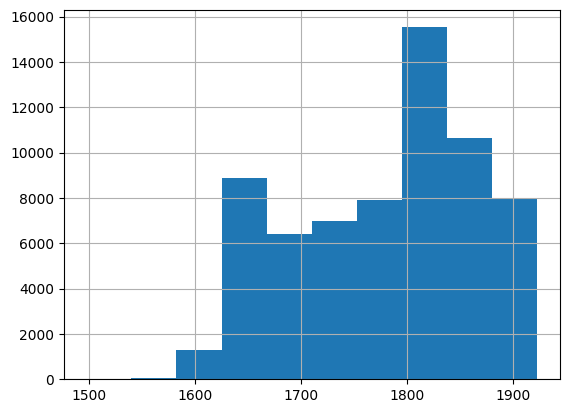

In [58]:
dlk.loc['pub_year'].hist()

### DLK samplen/separieren

In [59]:
dlk_1850 = dlk.T.query("1850 <= pub_year <= 1884").T
dlk_1885 = dlk.T.query("1885 <= pub_year <= 1918").T

In [60]:
dlk_1850.shape[1]

6429

In [61]:
dlk_1885.shape[1]

7215

In [62]:
# Hier nur beispielhaft 2x10 Texte;
# ursprünglich für ALLE Texte durchgeführt
dlk_1850_sample = dlk_1850.sample(n=10, axis='columns').copy()
dlk_1885_sample = dlk_1885.sample(n=10, axis='columns').copy()

# dlk_1850_sample = dlk_1850.copy()
# dlk_1885_sample = dlk_1885.copy()

### Geschichtslyrik vorhersagen

In [63]:
def get_text_from_poem (poem):
    text = ""

    for sidx, stanza in poem.items():
        for lidx, line in stanza.items():
            text = text + line['text'] + "\n"
        text = text + "\n"
        
    return text

In [64]:
for poem_id in tqdm(dlk_1850_sample.columns):
    poem = dlk_1850_sample[poem_id]['poem']
    poem_text = get_text_from_poem(poem)
    
    model_inputs = tokenize_function(poem_text)
    result = model(**model_inputs)["logits"]
    result = result.detach().numpy()[0]
    result = np.argmax(result)
    
    dlk_1850_sample.at['geschichtslyrik_pred', poem_id] = result

  0%|          | 0/10 [00:00<?, ?it/s]

In [65]:
for poem_id in tqdm(dlk_1885_sample.columns):
    poem = dlk_1885_sample[poem_id]['poem']
    poem_text = get_text_from_poem(poem)
    
    model_inputs = tokenize_function(poem_text)
    result = model(**model_inputs)["logits"]
    result = result.detach().numpy()[0]
    result = np.argmax(result)
    
    dlk_1885_sample.at['geschichtslyrik_pred', poem_id] = result

  0%|          | 0/10 [00:00<?, ?it/s]

### Ergebnisse exportieren

In [66]:
results = pd.concat([
    dlk_1850_sample.T[['author', 'title', 'pub_year', 'first_line', 'geschichtslyrik_pred']],
    dlk_1885_sample.T[['author', 'title', 'pub_year', 'first_line', 'geschichtslyrik_pred']],
])

In [67]:
results.head()

,author,title,pub_year,first_line,geschichtslyrik_pred
textgrid.poem.42449,"Liliencron, Detlev von","1L: Herbsttag, und doch wie weiches Frühlingsw...",1876,"Herbsttag, und doch wie weiches Frühlingswetter,",0
textgrid.poem.63517,"Heyse, Paul",1L: So weich und warm,1872,So weich und warm,0
textgrid.poem.55687,"Dörmann, Felix",1L: Dein Auge glüht und funkelt,1857,Dein Auge glüht und funkelt,0
textgrid.poem.63621,"Heyse, Paul",[bezwingst du nicht den dunklen Gram],1872,»bezwingst du nicht den dunklen Gram?,0
textgrid.poem.44609,"Grillparzer, Franz",[zur Enthüllung des Erzherzog Karl-Monuments],1860,"Die Welt war schwarz mit Nacht umzogen,",0


In [68]:
# results.to_csv("dlk_prediction.csv")

### Ergebnisse re-importieren

In [69]:
dlk_predictions = pd.read_csv("../resources/more/dlk_prediction.csv", index_col = [0])
dlk_predictions['decade'] = [(x//10)*10 for x in dlk_predictions['pub_year']]

In [70]:
dlk_predictions.head()

,author,title,pub_year,first_line,geschichtslyrik_pred,decade
dta.poem.8146,"Storm, Theodor",Octoberlied.,1852,"Schenk' ein den Wein, den holden!",0,1850
dta.poem.8147,"Storm, Theodor",Abseits.,1852,"Im warmen Mittagssonnenstrahle,",0,1850
dta.poem.8148,"Storm, Theodor",Weihnachtslied.,1852,Ein milder Stern hernieder lacht;,0,1850
dta.poem.8149,"Storm, Theodor",Im Walde.,1852,Verstummet ganz der Wind;,0,1850
dta.poem.8150,"Storm, Theodor",Elisabeth.,1852,Den Andern ich nehmen sollt';,0,1850


### Ergebnisse analysieren

In [71]:
# 1850–1884
dlk_predictions_1850 = dlk_predictions.query("1850 <= pub_year <= 1884")

print(f"Texte                      : {dlk_predictions_1850.shape[0]}")
print(f"davon Geschichtslyrik      : {dlk_predictions_1850.query('geschichtslyrik_pred == 1').shape[0]}")
print(f"davon Geschichtslyrik (%)  : {dlk_predictions_1850['geschichtslyrik_pred'].mean()}")

Texte                      : 6429
davon Geschichtslyrik      : 289
davon Geschichtslyrik (%)  : 0.04495255871830767


In [72]:
# 1885–1918
dlk_predictions_1885 = dlk_predictions.query("1885 <= pub_year <= 1918")

print(f"Texte                      : {dlk_predictions_1885.shape[0]}")
print(f"davon Geschichtslyrik      : {dlk_predictions_1885.query('geschichtslyrik_pred == 1').shape[0]}")
print(f"davon Geschichtslyrik (%)  : {dlk_predictions_1885['geschichtslyrik_pred'].mean()}")

Texte                      : 7215
davon Geschichtslyrik      : 151
davon Geschichtslyrik (%)  : 0.02092862092862093


In [73]:
dlk_predictions.groupby('decade')['geschichtslyrik_pred'].size()

decade
1850    2636
1860    1191
1870    1804
1880    1851
1890    3802
1900    1337
1910    1023
Name: geschichtslyrik_pred, dtype: int64

In [74]:
dlk_predictions.groupby('decade')['geschichtslyrik_pred'].mean()

decade
1850    0.046662
1860    0.027708
1870    0.044346
1880    0.042680
1890    0.012625
1900    0.005984
1910    0.067449
Name: geschichtslyrik_pred, dtype: float64

In [75]:
dlk_predictions.query("geschichtslyrik_pred == 1").head(10)

,author,title,pub_year,first_line,geschichtslyrik_pred,decade
dta.poem.8508,"Droste-Hülshoff, Annette von",Der sterbende General.,1860,"Er lag im dichtverh&#228;ngten Saal,",1,1860
dta.poem.10189,"Liliencron, Detlev von",Der Gouverneur.,1883,Auf einer Forscherfahrt im Ocean,1,1880
dta.poem.10221,"Liliencron, Detlev von",König Regnar Lodbrog.,1883,"Das war der König Regnar,",1,1880
dta.poem.10224,"Liliencron, Detlev von",Die Kapelle zum finstern Stern.,1883,Herzog Abel schwor beim Himmel weit,1,1880
dta.poem.10227,"Liliencron, Detlev von",König Abels Tod.,1883,"Der König träumt im Pupurzelt,",1,1880
dta.poem.10228,"Liliencron, Detlev von",König Abels Tod.,1883,"Zwei Ritter, mit schwarzem Panzer bewehrt,",1,1880
dta.poem.10233,"Liliencron, Detlev von",Herzog Knut der Erlauchte.,1883,"König Niels, der Alte, weißb&#228;rtig und kah...",1,1880
dta.poem.10234,"Liliencron, Detlev von",Herzog Knut der Erlauchte.,1883,"In Schleswig hält seinen Hof Herzog Knut,",1,1880
dta.poem.10235,"Liliencron, Detlev von",Herzog Knut der Erlauchte.,1883,"Knuts Brüder ließen die Hunde los,",1,1880
dta.poem.10236,"Liliencron, Detlev von",Die Schlacht bei Bornhöved.,1883,"Der König, der in Banden war",1,1880


In [76]:
dlk['dta.poem.10236']['metadata']

{'author': {'name': 'Liliencron, Detlev von',
  'birth': 'N.A.',
  'death': 'N.A.'},
 'title': 'Die Schlacht bei Bornhöved.',
 'genre': 'Lyrik',
 'period': 'N.A.',
 'pub_year': '1883',
 'urn': 'urn:nbn:de:kobv:b4-200905197184',
 'language': ['de:0.99'],
 'booktitle': 'Liliencron, Detlev von: Adjutantenritte und andere Gedichte. Leipzig, [1883].'}

In [77]:
print(get_text_from_poem(dlk['dta.poem.10236']['poem']))

Der König, der in Banden war             
Des Grafen von Schwerin,
Das war der König Waldemar,
Verstäubter Hermelin.

Bis er versprach, das ganze Land,
Wo deutscher Stamm und Kern,
Zurückzugeben in die Hand
Der anerkannten Herrn.

Auf Märschen lang und Märschen heiß
Des Königs Helmbusch vorn,
Der nickt und winkt scharlach und weiß
Und grüßt den Güldensporn.

Genüber schnitzt sein Widerpart
Den Pfeil sich und den Bolz,
Von Bremen Bischof Gerihardt,
Graf Adolf, Holstenstolz.

Maria Magdalenentag,
Mittsommersonnenschein,
Gelärm auf Schild und Eisendach,
Die Lanzen rasseln drein.

Wie Blatt und Zweig im Bachgespül,
So treibt manch blond Gesell.
Graf Adolf nur im Kampfgewühl,
Er treibt nicht von der Stell’.

„maria Magdalena, hilf,
Dämm’ ab die Dänenflut,
Du hebst zerknicktes Rohr und Schilf,
Gieb uns den alten Mut,

Der Graf packt fest in Zeug und Riem,
Sieg oder untergehn.
Da sieh! am Himmel zeigt sich ihm
Maria Magdalen,

Hei! flog der Graf ins Schlachtgedräng,
Die Axt durchbricht den Wa

### DLK-Autor:innen 1850–1918 analysieren

In [78]:
dlk_predictions['author'].nunique()

76

In [79]:
dlk_predictions['author'].value_counts().head(10)

author
Tucholsky, Kurt           724
Dauthendey, Max           646
Morgenstern, Christian    497
Bierbaum, Otto Julius     466
Löns, Hermann             436
Henckell, Karl            427
Heyse, Paul               407
Keller, Gottfried         401
Paoli, Betty              398
Holz, Arno                390
Name: count, dtype: int64

In [80]:
def get_author_test_results (author_dict):
    test_results = pd.DataFrame()
    for author in test_authors:
        search_item = author_dict[author]
        results = dlk.T.query("author.str.contains(@search_item)")['author'].value_counts()

        test_results.at[author, 'author_hits'] = results.shape[0]
        for i, author_hit in enumerate(results):
            test_results.at[author, f'author_hit_{i}'] = results.index[i] + f" ({results.iloc[i]})"

    return test_results

In [81]:
test_authors = {
    'Lingg, Hermann' : 'ingg',
    'Dahn, Felix' : 'Dahn',
    'Möser, Albert' : 'öser',
    'Meyer, Conrad Ferdinand' : 'eyer',
    'Gruppe, Otto Friedrich' : 'ruppe',
    'Gerok, Karl' : 'erok',
    'Fontane, Theodor' : 'ontan',
    'Müller von Königswinter, Wolfgang' : 'igswin',
    'Hesekiel, George' : 'sekiel',
    'Greif, Martin' : 'reif',
}

get_author_test_results(test_authors)

,author_hits,author_hit_0
"Lingg, Hermann",1.0,"Lingg, Hermann von (296)"
"Dahn, Felix",1.0,"Dahn, Felix (192)"
"Möser, Albert",0.0,NaN
"Meyer, Conrad Ferdinand",1.0,"Meyer, Conrad Ferdinand (231)"
"Gruppe, Otto Friedrich",0.0,NaN
"Gerok, Karl",0.0,NaN
"Fontane, Theodor",1.0,"Fontane, Theodor (280)"
"Müller von Königswinter, Wolfgang",0.0,NaN
"Hesekiel, George",0.0,NaN
"Greif, Martin",1.0,"Greiffenberg, Catharina Regina von (298)"


In [82]:
test_authors = {
    'Münchhausen, Börries von' : 'nchh',    
    'Lissauer, Ernst' : 'issau',
    'Gaudy, Alice von' : 'audy',
    'Geißler, Max' : 'ler',
    'Wickenburg, Albrecht von' : 'ickenb',
    'Schrutz, Demetrius' : 'chrutz',
    'Vierordt, Heinrich' : 'ieror',
    'Miegel, Agnes' : 'ieg',
    'Löns, Hermann' : 'Löns, H',
    'Strauß und Torney, Lulu von' : 'ulu',
    'Weber, Ernst' : 'erns',
    'Schüler, Gustav' : 'üler',
}

get_author_test_results(test_authors)

,author_hits,author_hit_0,author_hit_1,author_hit_2,author_hit_3,author_hit_4,author_hit_5,author_hit_6,author_hit_7,author_hit_8,author_hit_9,author_hit_10,author_hit_11,author_hit_12,author_hit_13,author_hit_14,author_hit_15,author_hit_16
"Münchhausen, Börries von",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Lissauer, Ernst",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Gaudy, Alice von",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Geißler, Max",17.0,"Schiller, Friedrich (945)","Hoffmann von Fallersleben, August Heinrich (797)","Keller, Gottfried (557)","Müller, Wilhelm (556)","Müller-Jahnke, Clara (224)","Ziegler, Christiana Mariana von (205)","Spindler, Christian Gotthold (185)","Miller, Johann Martin (160)","Müller, Friedrich (Maler Müller) (139)","Stieler, Kaspar von (134)","Stadler, Ernst (116)","Däubler, Theodor (60)","Gellert, Christian Fürchtegott (54)","Ramler, Karl Wilhelm (35)","Stieler, Kaspar (20)","Haller, Albrecht von (11)","Coleridge, Samuel Taylor (1)"
"Wickenburg, Albrecht von",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Schrutz, Demetrius",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Vierordt, Heinrich",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Miegel, Agnes",1.0,"Ziegler, Christiana Mariana von (205)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Löns, Hermann",1.0,"Löns, Hermann (436)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Strauß und Torney, Lulu von",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
test_authors = {
    'Münchhausen, Börries von' : 'nchh',
    'Miegel, Agnes' : 'ieg',
    'Strauß und Torney, Lulu von' : 'ulu',
}

get_author_test_results(test_authors)

,author_hits,author_hit_0
"Münchhausen, Börries von",0.0,NaN
"Miegel, Agnes",1.0,"Ziegler, Christiana Mariana von (205)"
"Strauß und Torney, Lulu von",0.0,NaN
